In [244]:
import pandas as pd
import numpy as np
from math import log

import matplotlib.pyplot as plt

### Считываем данные

In [245]:
df = pd.read_csv('logistic_regression_dataset.csv')

In [246]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Обработка данных
Размер набора данных

In [247]:
print(len(df))

7043


Проверка на наличие/отсутствие NaN 

In [248]:
columns = df.columns
print('number of NaN')
for name in columns:
    print('for ' + name + ':', df[name].isnull().sum())

number of NaN
for customerID: 0
for gender: 0
for SeniorCitizen: 0
for Partner: 0
for Dependents: 0
for tenure: 0
for PhoneService: 0
for MultipleLines: 0
for InternetService: 0
for OnlineSecurity: 0
for OnlineBackup: 0
for DeviceProtection: 0
for TechSupport: 0
for StreamingTV: 0
for StreamingMovies: 0
for Contract: 0
for PaperlessBilling: 0
for PaymentMethod: 0
for MonthlyCharges: 0
for TotalCharges: 0
for Churn: 0


В текущем наборе данных нет пропусков

Для переменных, принимающих только два значения (yes/no) преобразуем yes в 1 и no в 0

In [249]:
print('unique values')
#columns[0] не рассматриваем, т.к. это ID клиента
for name in columns[1:]:
    print('for ' + name + ':', pd.unique(df[name]))

unique values
for gender: ['Female' 'Male']
for SeniorCitizen: [0 1]
for Partner: ['Yes' 'No']
for Dependents: ['No' 'Yes']
for tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
for PhoneService: ['No' 'Yes']
for MultipleLines: ['No phone service' 'No' 'Yes']
for InternetService: ['DSL' 'Fiber optic' 'No']
for OnlineSecurity: ['No' 'Yes' 'No internet service']
for OnlineBackup: ['Yes' 'No' 'No internet service']
for DeviceProtection: ['No' 'Yes' 'No internet service']
for TechSupport: ['No' 'Yes' 'No internet service']
for StreamingTV: ['No' 'Yes' 'No internet service']
for StreamingMovies: ['No' 'Yes' 'No internet service']
for Contract: ['Month-to-month' 'One year' 'Two year']
for PaperlessBilling: ['Yes' 'No']
for PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card

следующие признаки имеют только 2 значения (yes/no)
* Partner
* Dependents
* PhoneService
* PaperlessBilling
* Churn (целевая переменная)

In [250]:
replace_names = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for name in replace_names:
    df[name] = df[name].replace(to_replace = ['Yes','No'],value = [1,0])

Для признака gender соответственно
* Male = 1
* Female = 0

In [251]:
df.gender = df.gender.replace(to_replace = ['Male','Female'],value = [1,0])

In [252]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Остальные категориальные переменные кодируем с помощью one-hot encoding уже после разбиения на обучающую и тестовую выборки. Данных в наборе мало (чуть больше 7000 примеров), поэтому выборок будет только две: одна обучающая, одна тестовая

Так как в данной задаче необходимо оченить вероятность того, что клиент перестанет пользоваться продуктом в следующем месяце, для тренировочного набора нужно выбирать те примеры, в которых клиент провел в более месяца, чтобы успеть зафиксировать все изменения, на основании которых принимается решение

In [253]:
len(df[df['tenure'] >= 2])/len(df)

0.911401391452506

в датасете 91% составляют примеры, в которых время жизни клиента в компании превышает или равно 2 месяцам, поэтому в данном случае можно разделить набор данных пополам на тестовый и тренировочный набор

In [254]:
train = df[:3500]
test = df[3500:]

one-hot encoding для категориальных признаков

In [255]:
train = pd.get_dummies(train, prefix = ['MultipleLines', 'InternetService','Contract', 'PaymentMethod'],
                   columns = ['MultipleLines', 'InternetService','Contract', 'PaymentMethod'])

In [256]:
train.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,Yes,No,Yes,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,No,No,...,0,1,0,1,0,0,0,0,1,0


### Подбор признаков для модели

Рассотрим для построения модели следующие признаки
* tenure
* gender
* Partner
* MonthlyCharges
* MultipleLines
* InternetService
* Contract
* PaymentMethod

Избавляемся от выбросов (количественные признаки)

In [257]:
train = train.assign(tenure = train.tenure.clip(0, np.percentile(train.tenure, 99)),
                     MonthlyCharges = train.MonthlyCharges.clip(0,np.percentile(train.MonthlyCharges, 99)))

Проанализируем влияние этих признаков на таргет через WoE и окончательно убедимся в необходимости их использования

### Непрерывные признаки

Вычисление WoE

In [258]:
def woe_calculation(data, target, feature):
    #Для всего набора данных 
    bad_events_all = data[target].sum()
    good_events_all = len(data) - bad_events_all
    #Для каждой группы
    data['bucket'] = np.floor(data[feature].rank(pct = True) * 20)
    data.head()
    data = data.groupby('bucket').agg(sum_of_events=(target,'sum'), all_counts=(target,'count'), average_feature=(feature,'mean'))
    good_events_bucket = data['all_counts'] - data['sum_of_events']
    bad_events_bucket = data['sum_of_events']        
    data['WoE'] = np.log(bad_events_bucket / good_events_bucket) - np.log(bad_events_all / good_events_all)
    return data

In [259]:
data = train.copy()

In [260]:
feature = 'MonthlyCharges'
target = 'Churn'

MonthlyCharges_woe = woe_calculation(data, 'Churn', 'MonthlyCharges')
tenure_woe = woe_calculation(data, 'Churn', 'tenure')

In [261]:
MonthlyCharges_woe.head(8)

,sum_of_events,all_counts,average_feature,WoE
bucket,,,,
0.0,17,184,19.396467,-1.246224
1.0,13,170,19.889118,-1.452740
2.0,10,172,20.329942,-1.746455
3.0,12,176,23.253409,-1.576403
4.0,36,172,28.572384,-0.290579
5.0,61,175,42.936857,0.413232
6.0,41,176,50.081818,-0.153146
7.0,32,174,55.901437,-0.451534


In [262]:
tenure_woe.head(8)

,sum_of_events,all_counts,average_feature,WoE
bucket,,,,
0.0,179,307,0.980456,1.373912
2.0,105,227,2.436123,0.888496
3.0,79,168,4.440476,0.919368
4.0,65,177,7.163842,0.494445
5.0,58,155,10.038710,0.524289
6.0,71,210,13.347619,0.366763
7.0,54,157,17.369427,0.392812
8.0,39,154,21.707792,-0.042814


Для обоих признаков значение WoE меняется на бакетах - переменные можно использовать для построения модели

Следующий этап проверки - проверка линейности. Строим графики зависимости признака от WoE 

In [263]:
def show_linear(data, feature_name):
    plt.scatter(data.average_feature, data.WoE)
    #простая регрессия для визуализации наличия линейной зависимости 
    m, b = np.polyfit(data.average_feature, data.WoE, 1)
    plt.plot(data.average_feature, m* data.average_feature + b, 'g')
    plt.xlabel(feature_name);
    plt.ylabel('WoE');

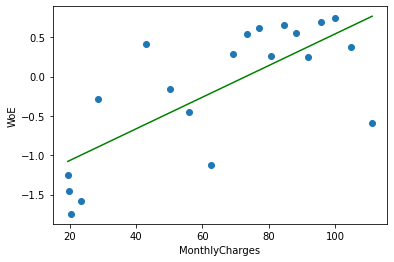

In [264]:
show_linear(MonthlyCharges_woe, 'MonthlyCharges')

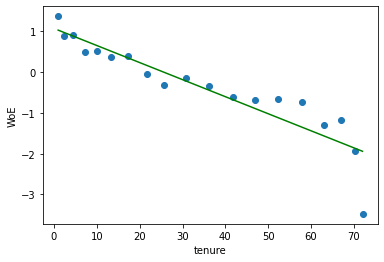

In [265]:
show_linear(tenure_woe, 'tenure')

Считаем, что линейная зависимость есть - оставляем эти признаки для построения модели

## Категориальные/бинарные признаки

Для этих признаков будем считать Information value

In [266]:
bad_full = sum(train.Churn.values)
good_full = len(train) - bad_full

In [267]:
def get_IV_for_features(data, bad_full, good_full, features_list):
    for feature in features_list:
        woe_data = woe_calculation(data,feature,'Churn')
        IV = 0
        for i in range(len(woe_data)):
            bad_x = woe_data.sum_of_events.iloc[i]
            good_x = woe_data.all_counts.iloc[i] - bad_x
            woe_value = woe_data.WoE.iloc[i]
            IV = IV + (((bad_x / bad_full) - (good_x / good_full)) *  woe_value)
        print('IV for ' + feature + ':', IV)


In [268]:
features_list = ['gender', 'Partner',
                'MultipleLines_No', 'MultipleLines_No phone service','MultipleLines_Yes',
                'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
                'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
                'PaymentMethod_Bank transfer (automatic)',
                'PaymentMethod_Credit card (automatic)',
                'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

get_IV_for_features(train, bad_full, good_full, features_list)

IV for gender: 1.5927141164032068e-05
IV for Partner: 0.10708184640304966
IV for MultipleLines_No: 0.005035302329831782
IV for MultipleLines_No phone service: 0.0029652985477249087
IV for MultipleLines_Yes: 0.008592709421458816
IV for InternetService_DSL: 0.09209888428450302
IV for InternetService_Fiber optic: 0.5853604613113684
IV for InternetService_No: 0.5031990107102917
IV for Contract_Month-to-month: 1.4366416027091533
IV for Contract_One year: 0.24683231056294744
IV for Contract_Two year: 1.1282873217856852
IV for PaymentMethod_Bank transfer (automatic): 0.06336196763503592
IV for PaymentMethod_Credit card (automatic): 0.1477561492452769
IV for PaymentMethod_Electronic check: 0.43700655635639585
IV for PaymentMethod_Mailed check: 0.05135690541141301


Ориентируемся на значения IV 0.1-0.5. Меньшие значения говорят о слабой связи между признаком и таргетом. Использование признаков с IV больше 0.5 может привести к ситуации, схожей с переобучением. 

Таким образом, итоговый набор параметров для обучения выглядит следующим образом:
* MonthlyCharges
* tenure
* Partner
* InternetService
* PaymentMethod

## Модель логистической регрессии

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [270]:
model = make_pipeline(StandardScaler(),LogisticRegression())

features_names = ['Partner', 'tenure', 'MonthlyCharges',
                'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
                'PaymentMethod_Bank transfer (automatic)',
                'PaymentMethod_Credit card (automatic)',
                'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

model.fit(np.array(train[features_names]),train['Churn'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Посчитаем точность с помощью ROC и log_loss



In [271]:
from sklearn.metrics import roc_auc_score, log_loss

In [272]:
print('roc_auc = %.3f' % roc_auc_score(train['Churn'], model.predict_proba(np.array(train[features_names]))[:,1]))
print('log_loss = %.3f' % log_loss(train['Churn'],model.predict_proba(np.array(train[features_names]))[:,1]))

roc_auc = 0.837
log_loss = 0.423


С этими признаками мы получили достаточно высокое значение площади под кривой (0.83) на трейне

### Точность модели на тестовом наборе данных

In [273]:
test = test.assign(
                    tenure = test.tenure.clip(0, np.percentile(test.tenure, 99)),
                    MonthlyCharges = test.MonthlyCharges.clip(0, np.percentile(test.MonthlyCharges, 99)),
                  )


In [274]:
test = pd.get_dummies(test,prefix = ['MultipleLines','InternetService','Contract', 'PaymentMethod'],
                    columns = ['MultipleLines','InternetService','Contract', 'PaymentMethod'])

In [275]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3500,5443-SCMKX,0,0,1,0,58,1,No,Yes,Yes,...,0,1,0,0,1,0,0,0,1,0
3501,8295-KMENE,0,0,1,1,59,1,Yes,No,Yes,...,1,0,0,0,0,1,0,0,0,1
3502,6738-ISCBM,1,0,0,0,44,0,Yes,No,Yes,...,1,0,0,0,1,0,0,0,1,0
3503,9821-BESNZ,1,0,0,0,66,1,No,Yes,No,...,0,1,0,0,1,0,0,0,1,0
3504,3678-MNGZX,1,0,1,1,68,1,No internet service,No internet service,No internet service,...,0,0,1,0,0,1,1,0,0,0


In [276]:
print('roc_auc = %.3f' % roc_auc_score(test['Churn'], model.predict_proba(np.array(test[features_names]))[:,1]))
print('log_loss = %.3f' % log_loss(test['Churn'],model.predict_proba(np.array(test[features_names]))[:,1]))

roc_auc = 0.816
log_loss = 0.451


Для тестового набора значение roc_auc составило 0.81 - с выбранными признаками удалось построить модель высокой точности